In [111]:
# rrrgggbb

# iterate through colours (0, 0, 0) to (255, 255, 255)
# but only use 3 bits for red, 3 bits for green, 2 bits for blue
# so 8 levels of red, 8 levels of green, 4 levels of blue

def generate_palette():
    palette = []
    for b in range(4):
        for r in range(8):
            for g in range(8):
                red = (r * 255) // 7
                green = (g * 255) // 7
                blue = (b * 255) // 3
                palette.append((red, green, blue))
    return palette

# now draw this palette to a matplotlib figure
import matplotlib.pyplot as plt

# order can be 'sequential', 'random', 'luminance', 'hue'
def draw_palette(palette, order='sequential'):
    p = palette[:]
    fig, ax = plt.subplots(figsize=(4, 16))
    if order == 'random':
        import random
        random.shuffle(p)
    elif order == 'luminance':
        p.sort(key=lambda color: 0.2126 * color[0] + 0.7152 * color[1] + 0.0722 * color[2])
    elif order == 'hue':
        import colorsys
        p.sort(key=lambda color: colorsys.rgb_to_hsv(color[0]/255, color[1]/255, color[2]/255)[0])
    elif order == 'sequential':
        # order by b, r, g
        p.sort(key=lambda color: (color[2], color[0], color[1]))

    for i, color in enumerate(p):
        ax.add_patch(plt.Rectangle((i % 8, i // 8), 1, 1, color=[c / 255 for c in color]))
        # display the hex code in the center of each square
        r, g, b = color
        r3 = (r * 7) // 255
        g3 = (g * 7) // 255
        b2 = (b * 3) // 255
        rrggbb = (r3 << 5) | (g3 << 2) | b2
        ax.text(i % 8 + 0.5, i // 8 + 0.5, f'{rrggbb:02X}', color='black' if (r*0.299 + g*0.587 + b*0.114) > 186 else 'white',
                ha='center', va='center', fontsize=12, fontweight='bold')

    ax.set_xlim(0, 8)
    ax.set_ylim(0, len(p) // 8)
    
    # Set x-axis ticks and labels for Green (0-7)
    ax.set_xticks(range(8))
    ax.set_xticklabels([str(i) for i in range(8)])
    ax.set_xlabel('G')
    
    # Set y-axis ticks and labels for Red (0-7) and Blue categories
    if order == 'sequential':
        y_ticks = []
        y_labels = []
        for b in range(4):
            for r in range(8):
                y_pos = b * 8 + r
                y_ticks.append(y_pos)
                if r == 0:  # Label the start of each blue section
                    y_labels.append(f'B={b}, R={r}')
                else:
                    y_labels.append(f'R={r}')
        
        ax.set_yticks(y_ticks)
        ax.set_yticklabels(y_labels, fontsize=8)
        ax.set_ylabel('R (grouped by B=0,1,2,3)')
    else:
        # no labels/ticks
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xticks([])
        ax.set_xlabel('')
    
    plt.tight_layout()
    plt.show()

In [99]:
pal = generate_palette()
len(pal)

256

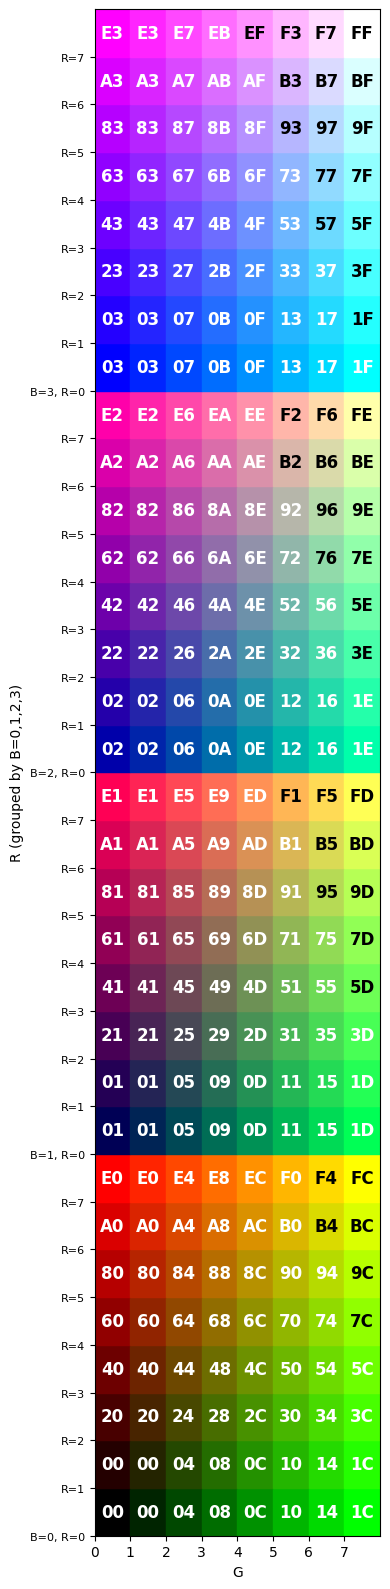

In [112]:
draw_palette(pal, order='sequential')

In [115]:
# select 16 random colours from the palette 'pal' (including black and white) and convert them to RRRGGGBB
import random
sampled_colors = random.sample(pal, 14)
sampled_colors.append((0, 0, 0))  # black
sampled_colors.append((255, 255, 255))  # white
sampled_colors.sort()  # sort by r, g, b
for color in sampled_colors:
    r, g, b = color
    r3 = (r * 7) // 255
    g3 = (g * 7) // 255
    b2 = (b * 3) // 255
    rrggbb = (r3 << 5) | (g3 << 2) | b2
    print(f'Color RGB: ({r:3}, {g:3}, {b:3}) -> RRRGGGBB: {rrggbb:02X}')


Color RGB: (  0,   0,   0) -> RRRGGGBB: 00
Color RGB: ( 36, 109,  85) -> RRRGGGBB: 09
Color RGB: ( 72, 255,  85) -> RRRGGGBB: 3D
Color RGB: ( 72, 255, 255) -> RRRGGGBB: 3F
Color RGB: (109, 145,  85) -> RRRGGGBB: 4D
Color RGB: (145, 109,  85) -> RRRGGGBB: 69
Color RGB: (182,  36,   0) -> RRRGGGBB: 80
Color RGB: (182,  36,  85) -> RRRGGGBB: 81
Color RGB: (182,  72, 170) -> RRRGGGBB: 86
Color RGB: (182, 182, 170) -> RRRGGGBB: 92
Color RGB: (218, 145, 255) -> RRRGGGBB: AF
Color RGB: (255,  72, 255) -> RRRGGGBB: E7
Color RGB: (255, 145, 170) -> RRRGGGBB: EE
Color RGB: (255, 218,  85) -> RRRGGGBB: F5
Color RGB: (255, 255,   0) -> RRRGGGBB: FC
Color RGB: (255, 255, 255) -> RRRGGGBB: FF


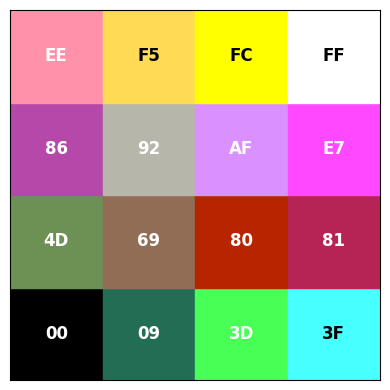

In [116]:
# draw the sampled_colours as 16 squares in a 4x4 grid
# print the binary value of each colour in the square

def draw_sampled_colors(colors):
    fig, ax = plt.subplots(figsize=(4, 4))
    for i, color in enumerate(colors):
        r, g, b = color
        r3 = (r * 7) // 255
        g3 = (g * 7) // 255
        b2 = (b * 3) // 255
        rrggbb = (r3 << 5) | (g3 << 2) | b2
        ax.add_patch(plt.Rectangle((i % 4, i // 4), 1, 1, color=[c / 255 for c in color]))
        ax.text(i % 4 + 0.5, i // 4 + 0.5, f'{rrggbb:02X}', color='black' if (r*0.299 + g*0.587 + b*0.114) > 186 else 'white',
                ha='center', va='center', fontsize=12, fontweight='bold')
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 4)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.tight_layout()
    plt.show()


draw_sampled_colors(sampled_colors)